<function lorenz96 at 0x0000026FBEA5B9D0>
True True True


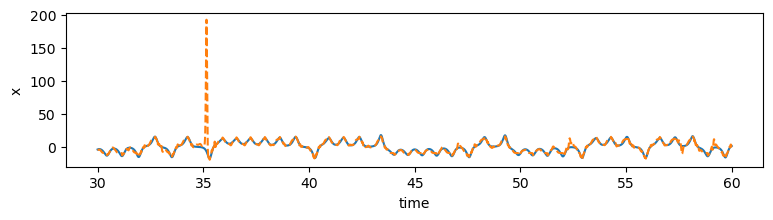

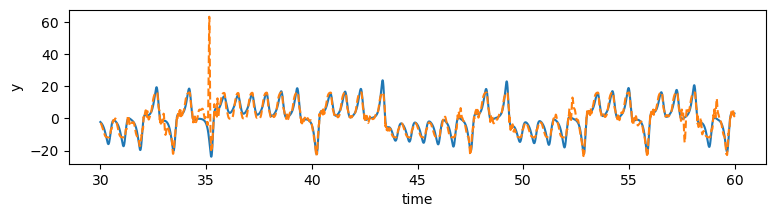

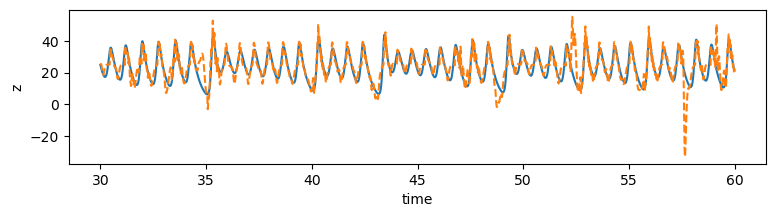

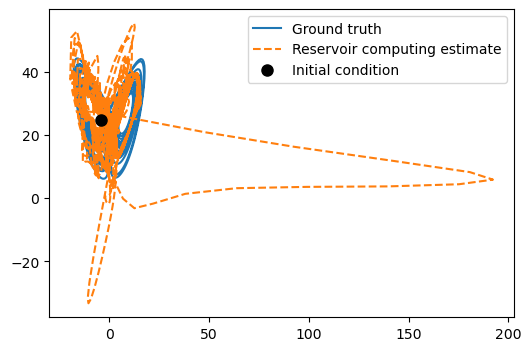

In [1]:
from reservoirpy.nodes import Reservoir, Input, Output
from reservoirpy.datasets import lorenz96
import matplotlib.pyplot as plt

## L
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import sparse

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
dt = 0.01

def f(state, t): #функция
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

x_train_length = 60.0 #<-- здесь выбираем, от 0 до каких пор знаем реальные значения
sequence_length = 6000  #<-- здесь выбираем, от 0 до каких пор тренируемся
x_sim_length = int(x_train_length/dt) #<-- здесь выбираем, от 0 до каких пор предсказываем

state0 = [1.0, 1.0, 1.0]
time_steps = np.arange(0.0, x_train_length, dt) #<-- здесь выбираем, от 0 до каких пор знаем реальные значения

X = odeint(f, state0, time_steps) 
## L

print(lorenz96)

##1
import reservoirpy as rpy

rpy.verbosity(0)
rpy.set_seed(42)  # сделать все воспроизводимым

reservoir = Reservoir(100, lr=0.5, sr=0.9)

import numpy as np
import matplotlib.pyplot as plt

#X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)

from reservoirpy.nodes import Reservoir, Ridge, FORCE, ESN

##<-----здесь
##14
from reservoirpy.nodes import Ridge

readout = Ridge(ridge=1e-7)
#При установке ridgeпараметра считывания на 1e-7. Это регуляризация, гиперпараметр, который поможет избежать переобучения.

##15
#Определите тренировочную задачу
#Подобные узлы Ridge можно обучать с помощью их fit() метода
#два временных ряда: входной временной ряд и целевой временной ряд.
X_train = X[:3000]
Y_train = X[1:3001]

##16
train_states = reservoir.run(X_train, reset=True)

##17
#тренируем
#warmup параметр - установить количество временных шагов, которые мы хотим отбросить
readout = readout.fit(train_states, Y_train, warmup=10)

##18
test_states = reservoir.run(X[3000:])
Y_pred = readout.run(test_states)

##19
#Создайте модель ESN
#ESN — это очень простой тип модели, содержащий два узла: резервуар и вывод.
#Чтобы объявить связи между узлами и построить модель, используйте >> оператор:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(100, lr=0.5, sr=0.9)
ridge = Ridge(ridge=1e-7)

esn_model = reservoir >> ridge

##20
#Тренируйте ESN
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

##21
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

##22
#Запустите ESN
Y_pred = esn_model.run(X[3000:])

def plot_dimension(dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps[3000:], X[3000:][:, dim]) #реал.
    ax.plot(time_steps[3000:], Y_pred[:, dim], "--") #предск.
    plt.xlabel("time")
    plt.ylabel(name) 
    plt.draw()
    plt.show()

plot_dimension(0, 'x')
plot_dimension(1, 'y')
plot_dimension(2, 'z')

plt.figure(figsize=(6, 4))
plt.plot(X[3000:][:, 0], X[3000:][:, 2], label="Ground truth")
plt.plot(Y_pred[:, 0], Y_pred[:, 2],'--', label="Reservoir computing estimate")
plt.plot(X[3000:][0, 0], X[3000:][0, 2], "ko", label="Initial condition", markersize=8)

plt.legend()
plt.show()